# (First step) importing all necessary libraries

In [749]:
import numpy as np # its about mathematical calculations
import pandas as pd # its about importing and reading all necessay files as well as creating dataframes
import seaborn as sns # its used for drawing mathematical visual diagrams
import matplotlib.pyplot as plt # its majory used in visaulization
from sklearn.model_selection import train_test_split # its used to split our data into train and test sets 
from sklearn.preprocessing import StandardScaler # it helps to standardize the features of dataset by removing the mean and scaling to unit varience
from sklearn.linear_model import LinearRegression # it enables us in creating models using LinearRegression


# (Second step) reading our dataset

In [750]:
df = pd.read_csv("C:/Users/HP/Desktop/Data Science-core/lectures/machine learning and ai/module_5_auto.csv",header=0)
df.to_csv() # this allows us to save pandas DataFrame as a CSV file
df.head() # This displays the first five columns of the dataframe


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,2,164,audi,std,four,sedan,fwd,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,2,164,audi,std,four,sedan,4wd,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# (Third step) sanity check for the data

In [751]:
df.shape # this displays the total rows and columns of our data frames


(201, 32)

In [752]:
df.info() # this displays the summary of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   Unnamed: 0         201 non-null    int64  
 3   symboling          201 non-null    int64  
 4   normalized-losses  201 non-null    int64  
 5   make               201 non-null    object 
 6   aspiration         201 non-null    object 
 7   num-of-doors       201 non-null    object 
 8   body-style         201 non-null    object 
 9   drive-wheels       201 non-null    object 
 10  engine-location    201 non-null    object 
 11  wheel-base         201 non-null    float64
 12  length             201 non-null    float64
 13  width              201 non-null    float64
 14  height             201 non-null    float64
 15  curb-weight        201 non-null    int64  
 16  engine-type        201 non

In [753]:
numeric_colummn = df.select_dtypes(include=["number"]) # it selects only columns with numerical data
print(numeric_colummn)

     Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  symboling  normalized-losses  \
0               0             0           0          3                122   
1               1             1           1          3                122   
2               2             2           2          1                122   
3               3             3           3          2                164   
4               4             4           4          2                164   
..            ...           ...         ...        ...                ...   
196           196           196         196         -1                 95   
197           197           197         197         -1                 95   
198           198           198         198         -1                 95   
199           199           199         199         -1                 95   
200           200           200         200         -1                 95   

     wheel-base    length     width  height  curb-weight  ...  stroke  \
0 

In [754]:
numeric_colummn.isnull().sum() # this checks for the missings values in our new dataframe(numeric_column) for only numerical values

Unnamed: 0.2         0
Unnamed: 0.1         0
Unnamed: 0           0
symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64

In [755]:
df_droped_rows = numeric_colummn.dropna() # this dropes columns with missing values from our new dataframe(df_droped_rows)

In [756]:
df_droped_rows.isnull().sum() # this checks again for the null or missing values in our new dataframe(df_droped_rows)

Unnamed: 0.2         0
Unnamed: 0.1         0
Unnamed: 0           0
symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64

In [757]:
df_droped_rows.info() # checking again for the dataframe information, to know whether its containing only numerical values

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 200
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       197 non-null    int64  
 1   Unnamed: 0.1       197 non-null    int64  
 2   Unnamed: 0         197 non-null    int64  
 3   symboling          197 non-null    int64  
 4   normalized-losses  197 non-null    int64  
 5   wheel-base         197 non-null    float64
 6   length             197 non-null    float64
 7   width              197 non-null    float64
 8   height             197 non-null    float64
 9   curb-weight        197 non-null    int64  
 10  engine-size        197 non-null    int64  
 11  bore               197 non-null    float64
 12  stroke             197 non-null    float64
 13  compression-ratio  197 non-null    float64
 14  horsepower         197 non-null    float64
 15  peak-rpm           197 non-null    float64
 16  city-mpg           197 non-null

Our dataframe is now only with numerical values

In [758]:
df_droped_rows.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [759]:
# checking for duplicates
df_droped_rows.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 197, dtype: bool

#To remove duplicated we use drop_duplicates()

In [760]:
# removing duplicates
df1 = df_droped_rows.drop_duplicates()
df1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,...,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,...,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,...,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,...,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


In [761]:
df1.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


# Fourth (Step) Handling outliers

In [762]:
#function to handle outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

In [763]:
#displaying numerical columns
df1.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'symboling',
       'normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [764]:
# creating a list of columns to process
columns = [
    'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'symboling',
    'normalized-losses', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
    'city-L/100km', 'diesel', 'gas'
]

In [765]:
# Iterate through the specified columns and handle outliers
for col in columns:
    if col in df1.columns:  # Ensure the column exists in df1
        lower_bound, upper_bound = remove_outliers(df1[col])
        df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
        df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])
    else:
        print(f"Column '{col}' not found in DataFrame")

# df1 is now updated with outliers capped


# Displaying boxplots for different columns

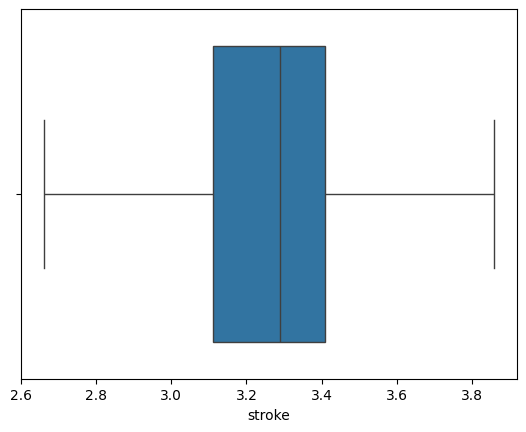

In [766]:
sns.boxplot(data=df1, x='stroke')
plt.show()


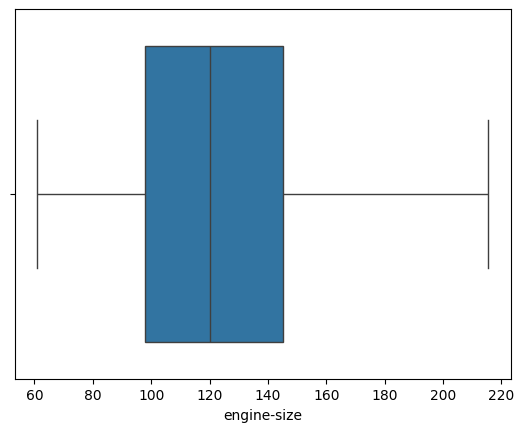

In [767]:
sns.boxplot(data=df1, x='engine-size')
plt.show()

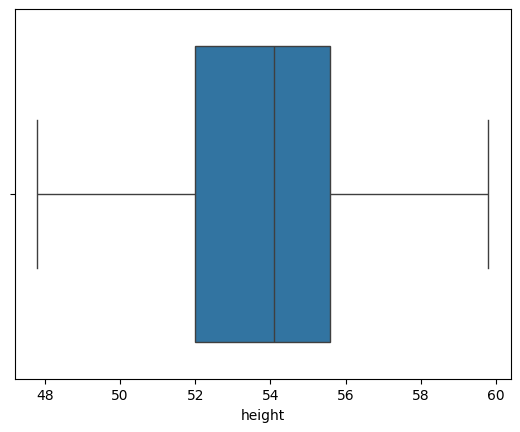

In [768]:
sns.boxplot(data=df1, x='height')
plt.show()

# Visualising the data

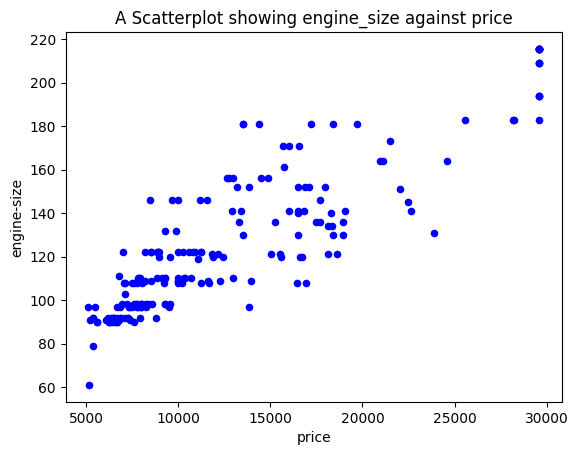

In [769]:
df1.plot(kind='scatter',x='price',y='engine-size',color='blue')
plt.title("A Scatterplot showing engine_size against price")
plt.show()

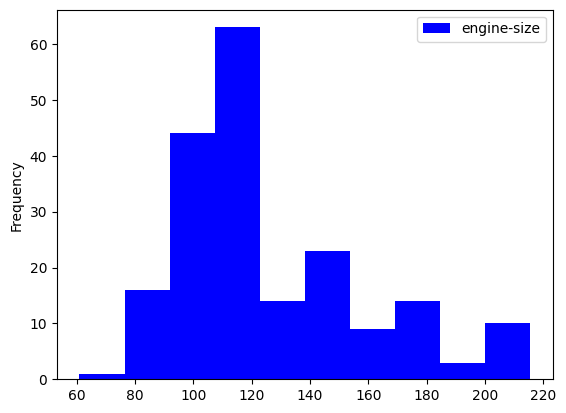

In [770]:
df1.plot(kind='hist',x='price',y='engine-size',color='blue')
plt.show()

# Fifth (Step) Building a Model

In [771]:
# first let's set our predictor variables-x and response/ values we want to predict-y
x = df1.drop('price', axis=1)
y = df1['price']


In [772]:
# spliting data by taking 70% of data for training and 30% of data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [773]:
y_test_actual = y_test

In [774]:
#training the model
lm = LinearRegression()


In [775]:
lm.fit(x_train.values, y_train)

LinearRegression()

In [776]:
lm.fit(x_test.values, y_test)

LinearRegression()

In [777]:
# Make predictions using a numpy array (without column names)
y_pred = lm.predict(x_test.values)



In [778]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [779]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 8260.68508394,  6449.51382429,  8512.59580448,  6756.86287943,
       10929.16737158])

In [780]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

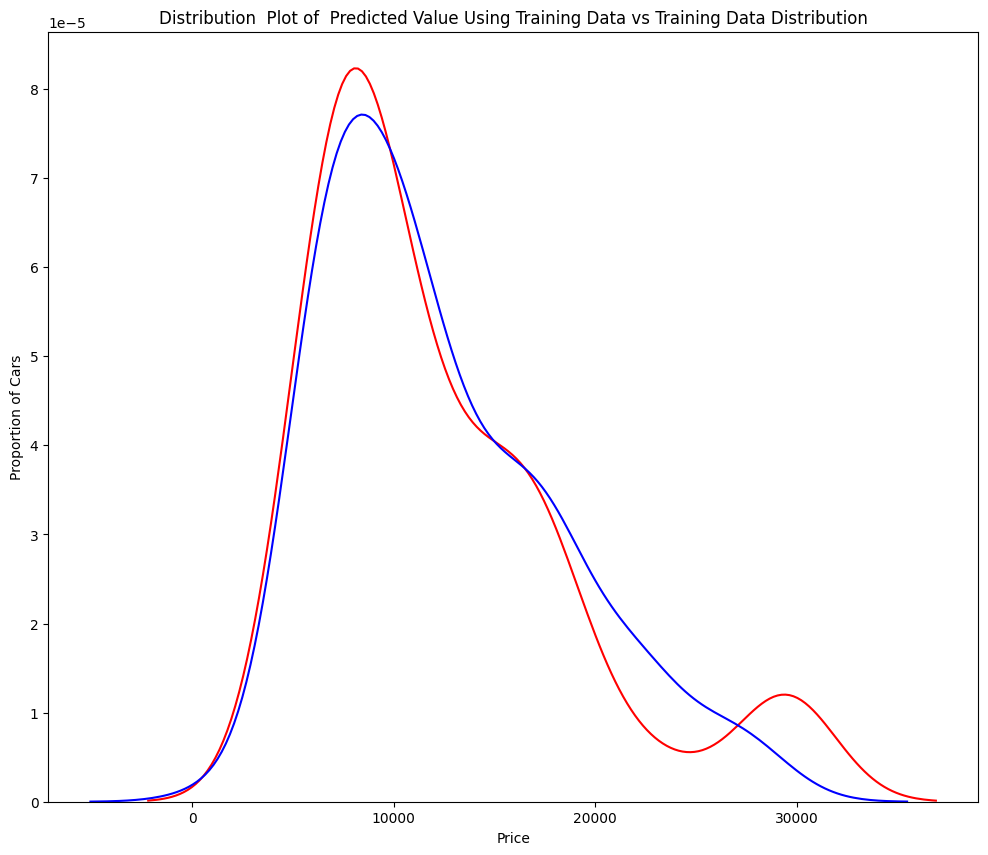

In [781]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

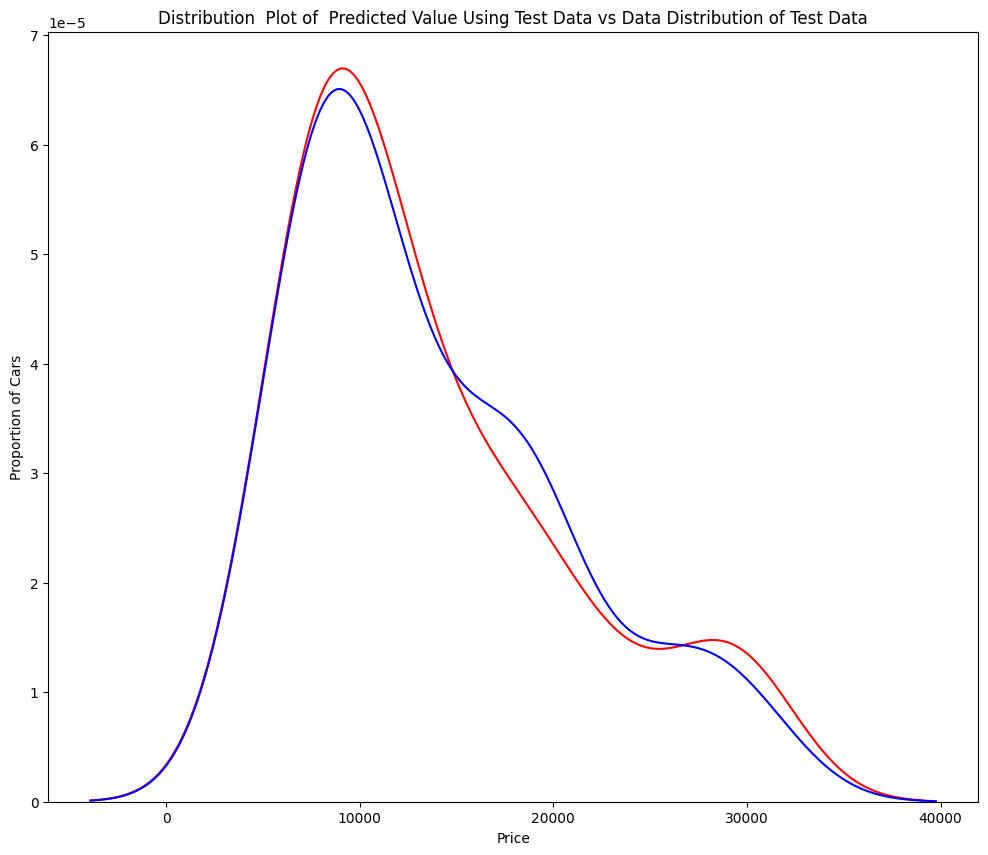

In [782]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)